<a href="https://colab.research.google.com/github/PranithCode/DDoS_Prediction/blob/main/DDos_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

# Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
df = pd.read_csv('Downloads/DDos.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,DDoS
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
66235,80,78336816,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,22026.0,0.0,22026.0,22026.0,78300000.0,0.0,78300000.0,78300000.0,DDoS
66236,80,51088,3,5,26,11601,20,0,8.666667,10.263203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preprocessing

In [ ]:
#Remove spaces before column names
df.columns = df.columns.str.strip()

In [ ]:
#Unique values in the label target column
df['Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

In [ ]:
#Check for Nan
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 79, dtype: int64

In [ ]:
missing = df.isna().sum()
missing[missing > 0]

Fwd URG Flags              1
Bwd URG Flags              1
Fwd Header Length          1
Bwd Header Length          1
Fwd Packets/s              1
Bwd Packets/s              1
Min Packet Length          1
Max Packet Length          1
Packet Length Mean         1
Packet Length Std          1
Packet Length Variance     1
FIN Flag Count             1
SYN Flag Count             1
RST Flag Count             1
PSH Flag Count             1
ACK Flag Count             1
URG Flag Count             1
CWE Flag Count             1
ECE Flag Count             1
Down/Up Ratio              1
Average Packet Size        1
Avg Fwd Segment Size       1
Avg Bwd Segment Size       1
Fwd Header Length.1        1
Fwd Avg Bytes/Bulk         1
Fwd Avg Packets/Bulk       1
Fwd Avg Bulk Rate          1
Bwd Avg Bytes/Bulk         1
Bwd Avg Packets/Bulk       1
Bwd Avg Bulk Rate          1
Subflow Fwd Packets        1
Subflow Fwd Bytes          1
Subflow Bwd Packets        1
Subflow Bwd Bytes          1
Init_Win_bytes

In [ ]:
# Remove null values
df = df.dropna()

In [ ]:
df.isna().sum()
missing = df.isna().sum()
missing[missing > 0]

#Data has no Nan values

Series([], dtype: int64)

In [ ]:
# Know the data types of columns
df.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Label                           object
Length: 79, dtype: object

In [ ]:
# Count columns by data type
df.dtypes.value_counts()


float64    58
int64      20
object      1
Name: count, dtype: int64

In [ ]:
#Convert the Strings to int
df['Label'] = df['Label'].astype('category')
df['Label'] = df['Label'].cat.codes

#To assign Manually
#df['Label'] = df['Label'].replace({'Benign': 0, 'DDos': 1})

In [ ]:
df.tail()
# DDos = 1; Benign = 0

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0,1
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0,1
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
66235,80,78336816,8,6,56,11601,20,0,7.000000,5.656854,...,20.0,22026.0,0.0,22026.0,22026.0,78300000.0,0.0,78300000.0,78300000.0,1


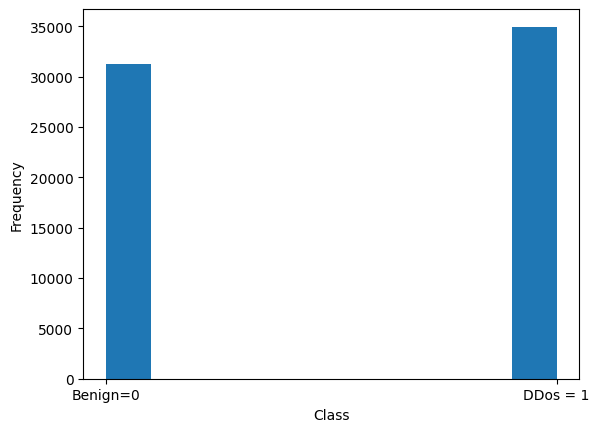

In [ ]:
#Show df
plt.hist(df['Label'])
plt.xlabel("Class")
plt.xticks([0,1], labels= ['Benign=0', 'DDos = 1'])
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Data is Balanced

Data Exploration

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,66236.000000,...,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,66236.000000
mean,6454.701794,1.388757e+07,5.180295,5.119225,695.632677,6.716764e+03,351.447068,23.466151,110.716876,135.440531,...,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06,0.527689
std,16711.002247,2.815859e+07,16.873784,23.797303,3230.070242,4.222729e+04,1435.520764,136.609404,400.379518,613.426001,...,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07,0.499237
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,4.995450e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,9.949430e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.000000,7.640073e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06,1.000000
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


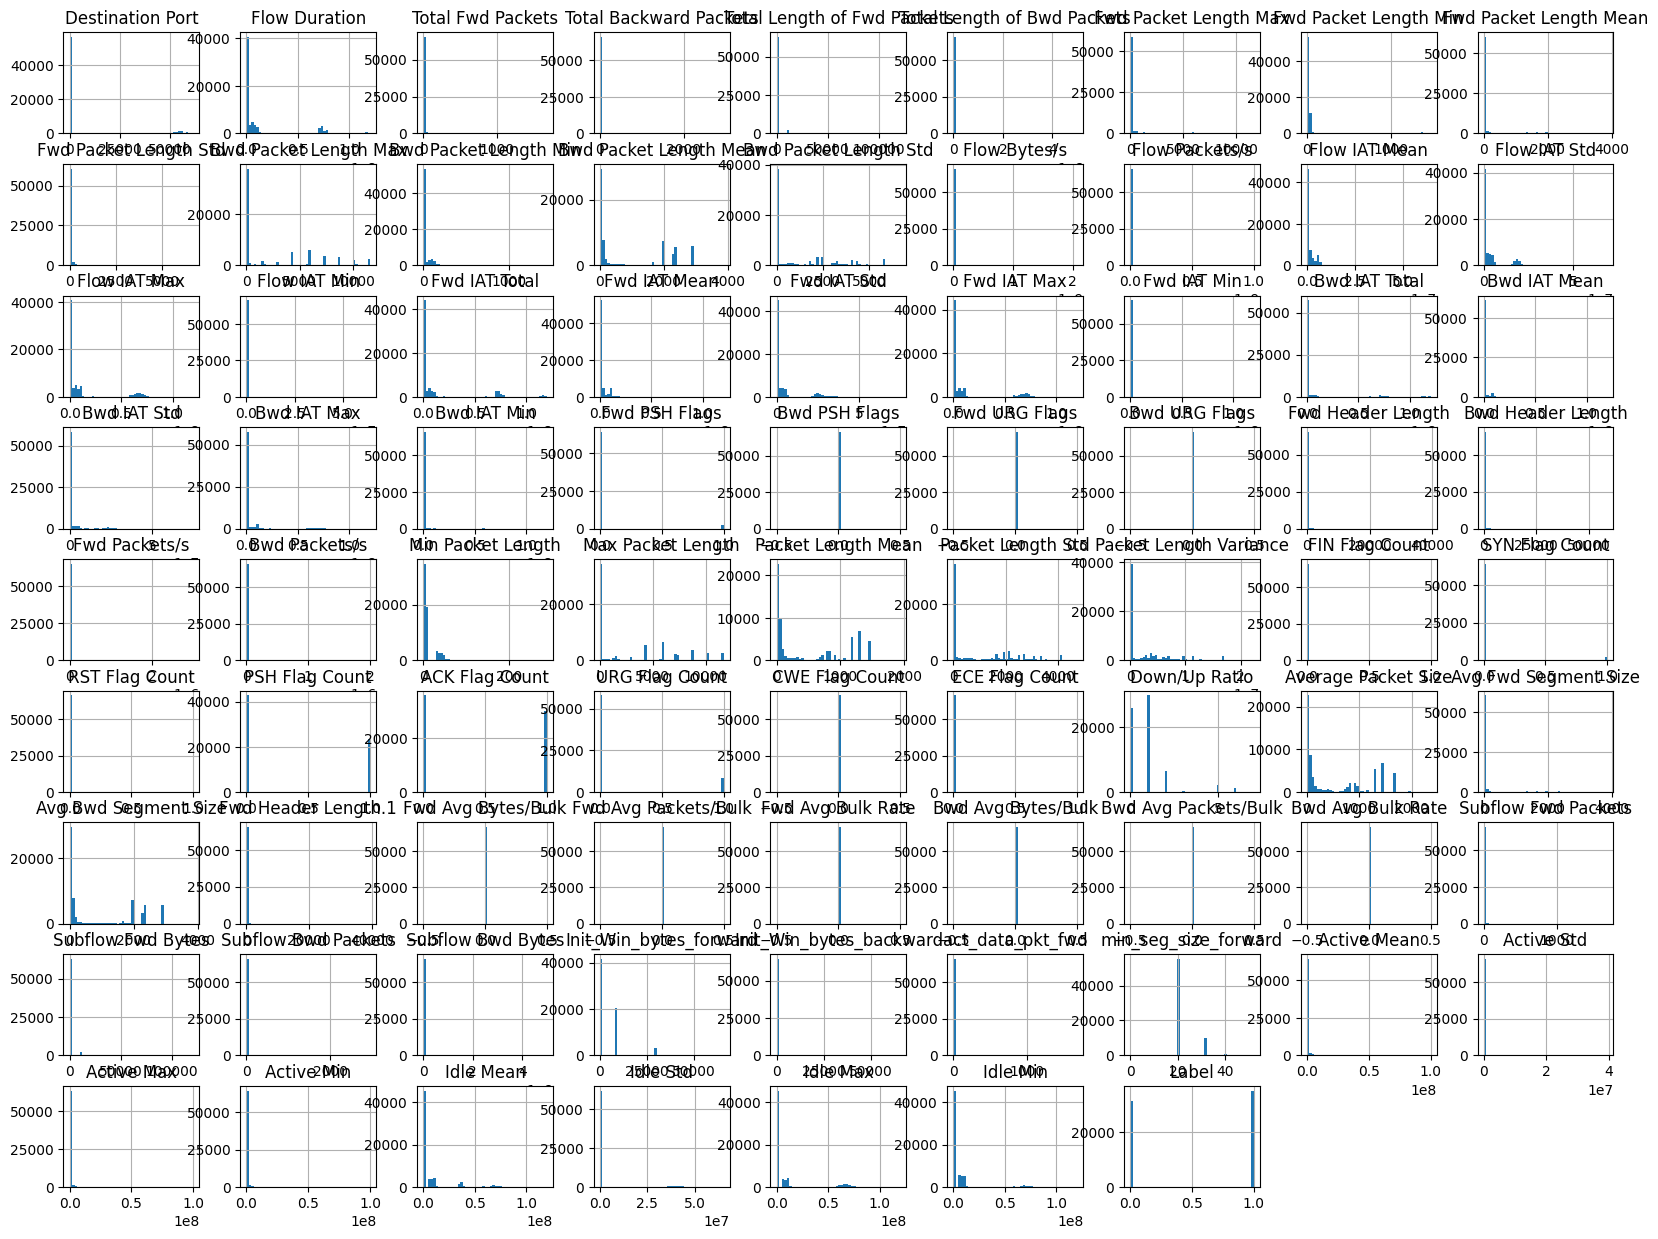

In [ ]:
#Histogram for each feature
df.hist(bins=50, figsize=(20,15))
plt.show()

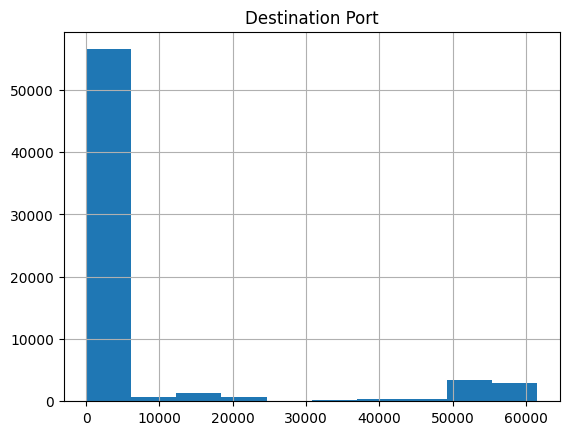

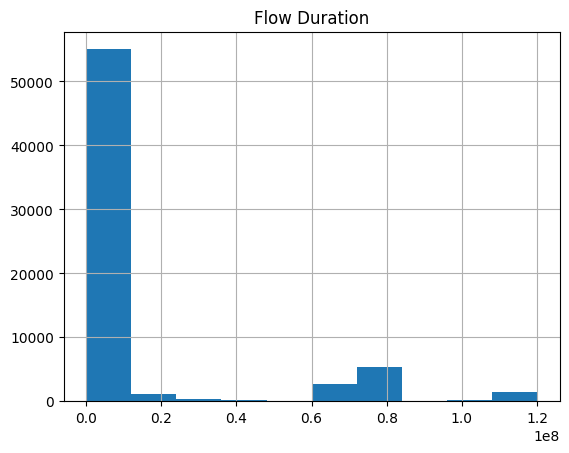

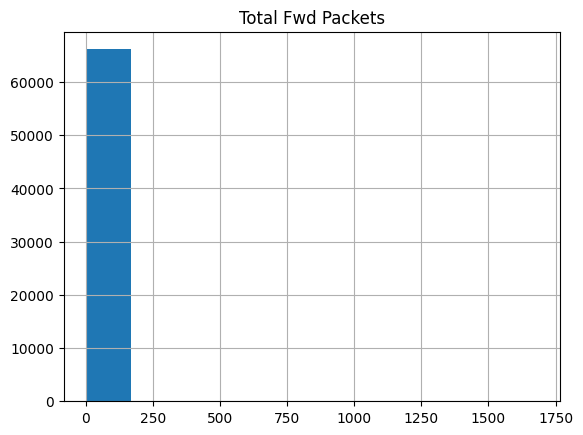

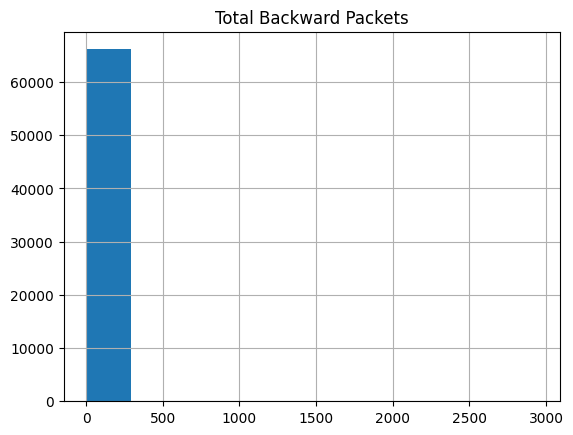

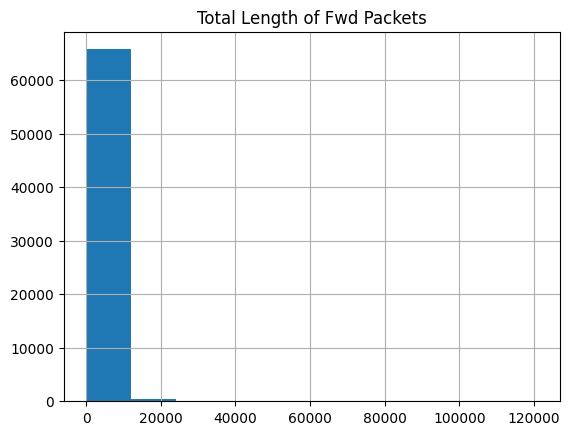

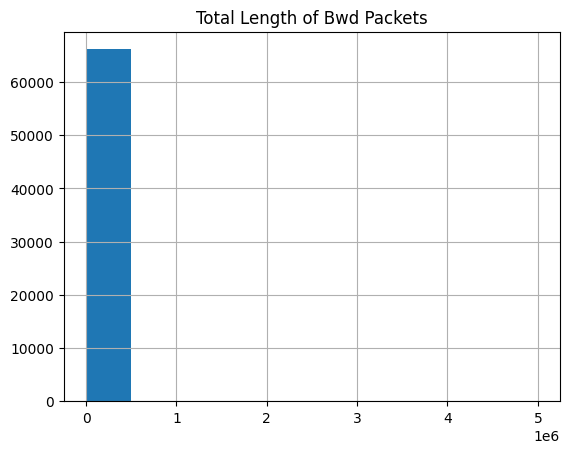

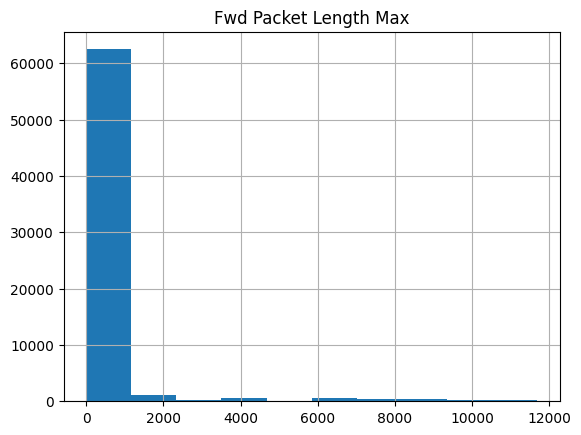

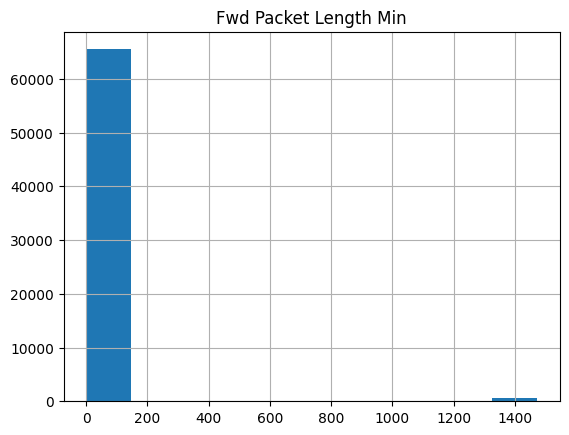

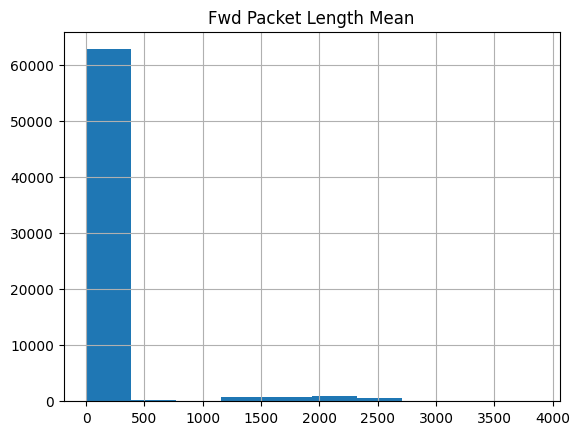

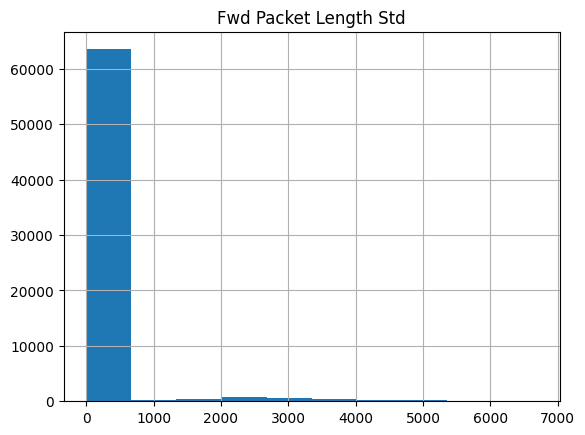

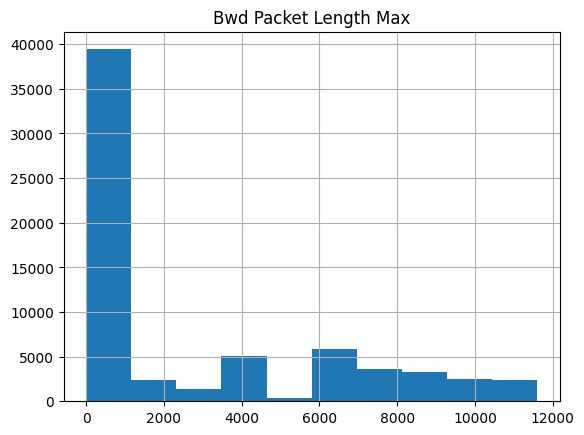

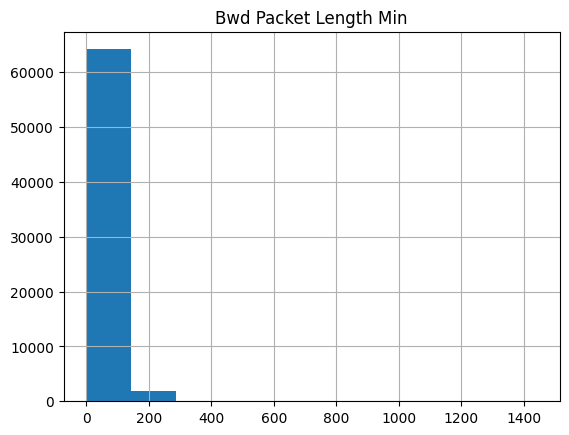

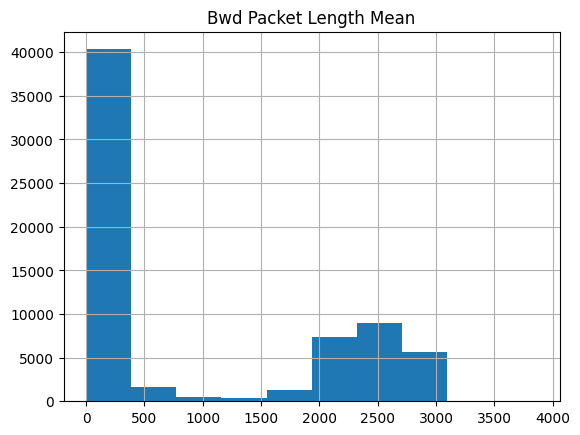

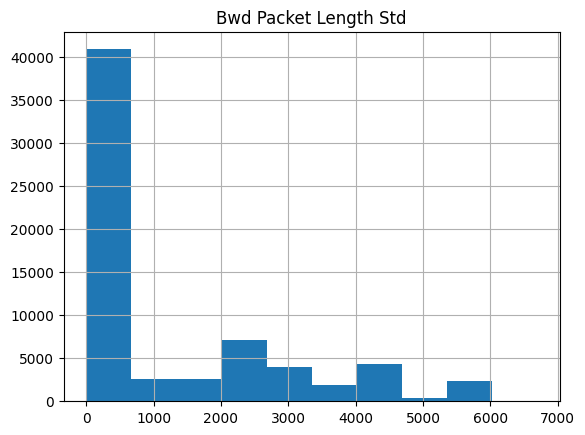

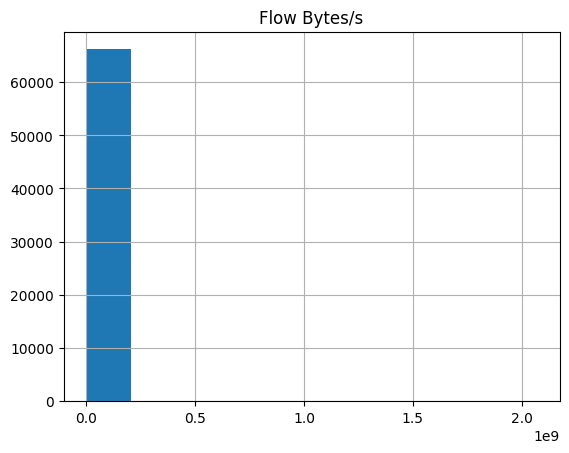

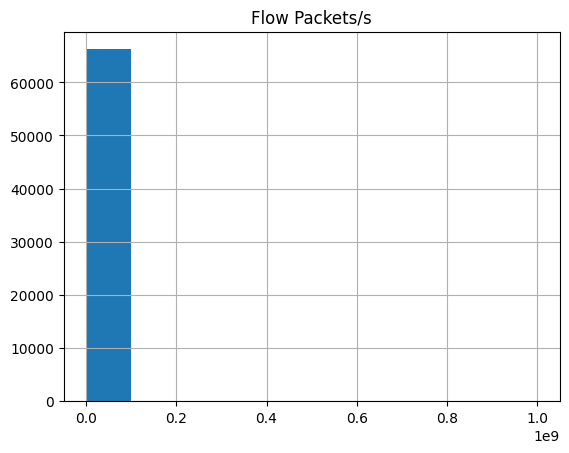

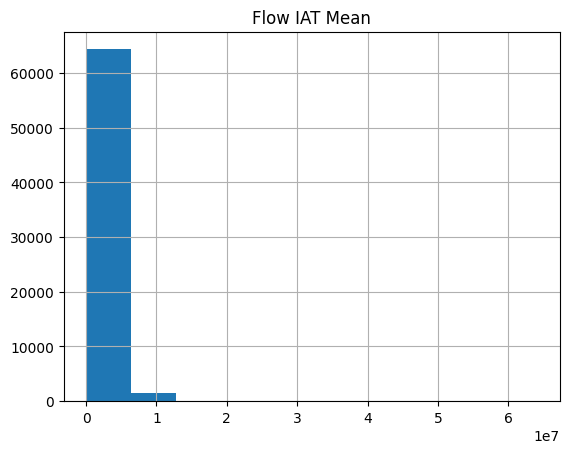

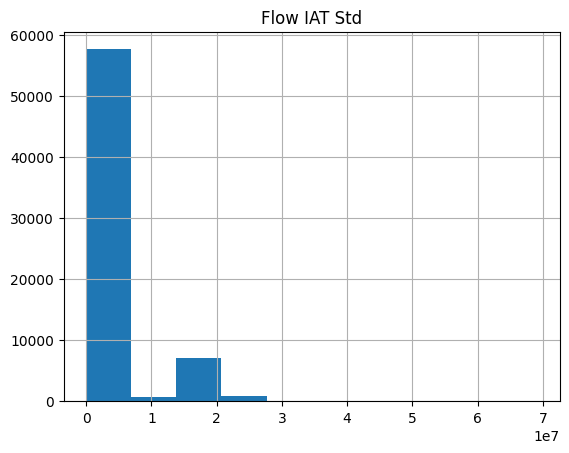

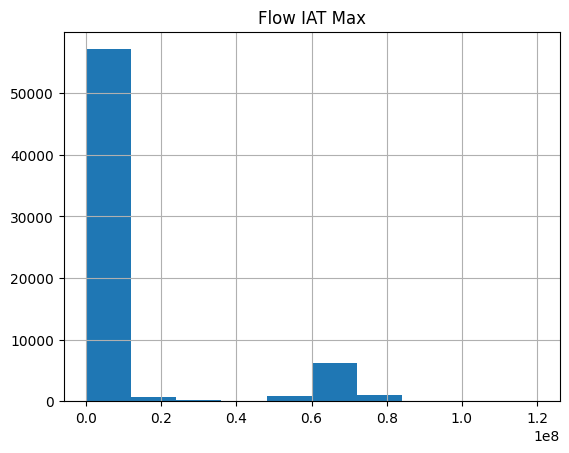

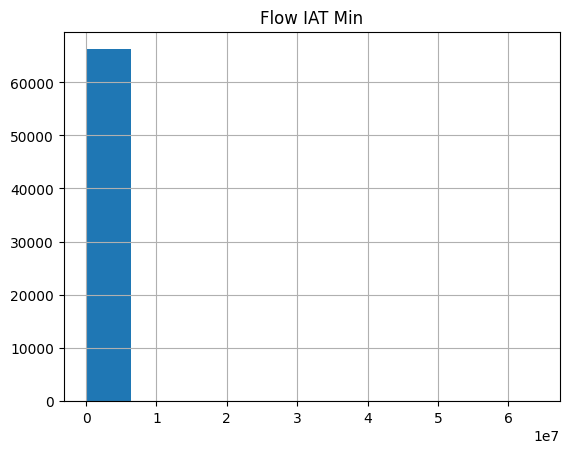

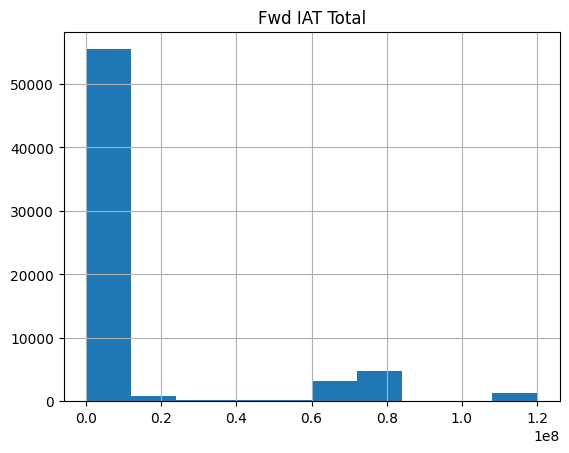

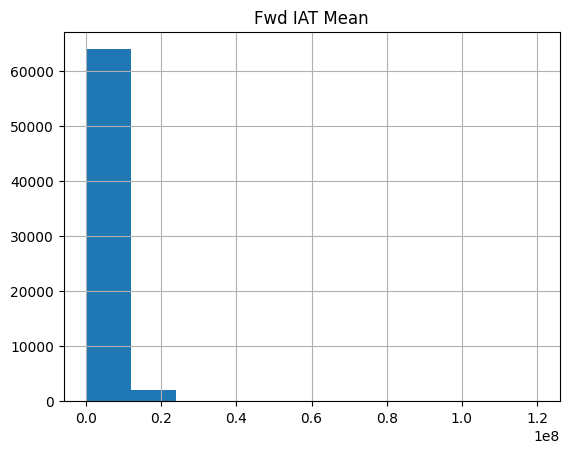

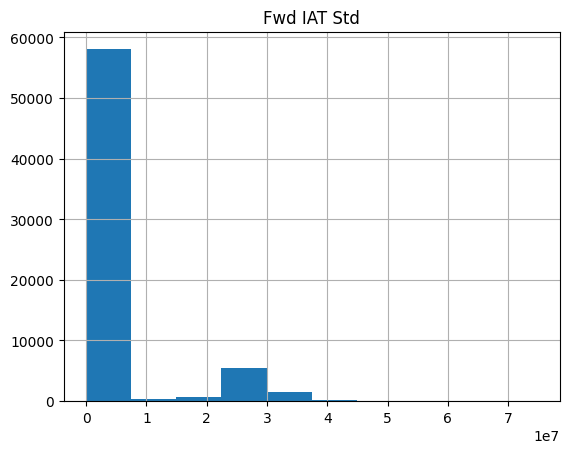

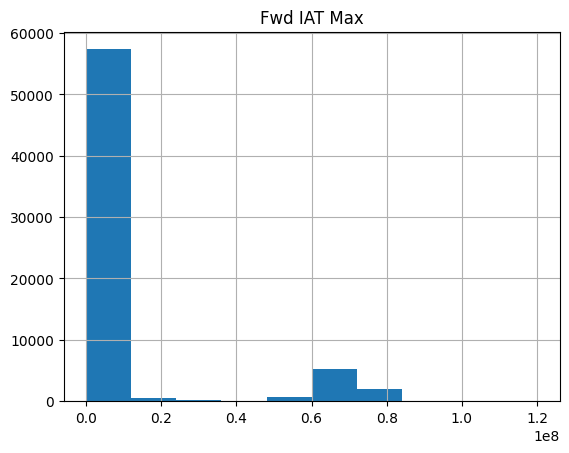

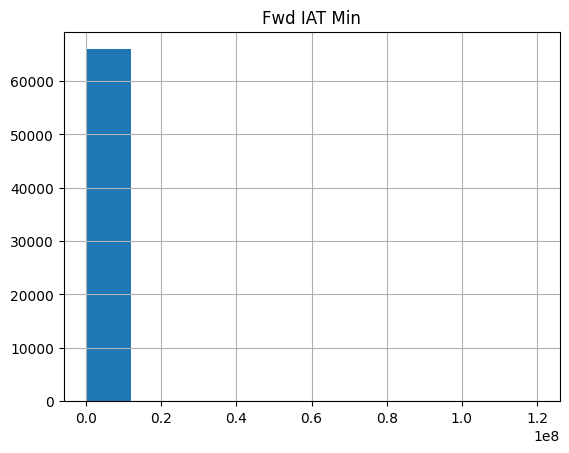

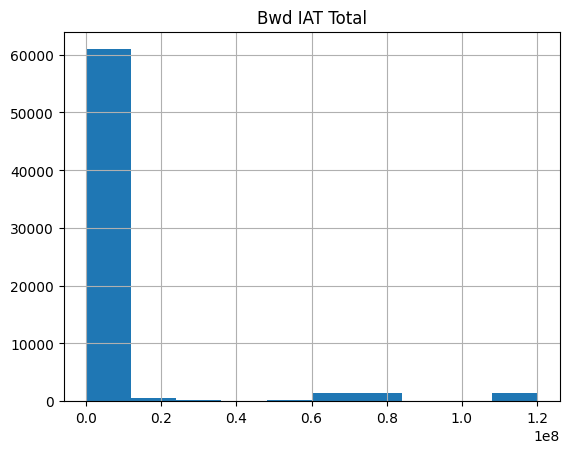

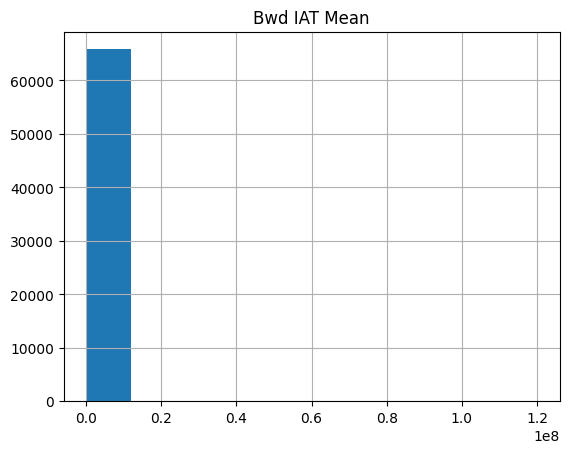

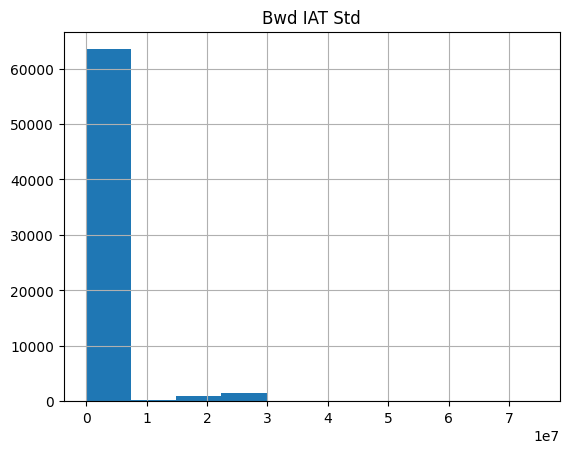

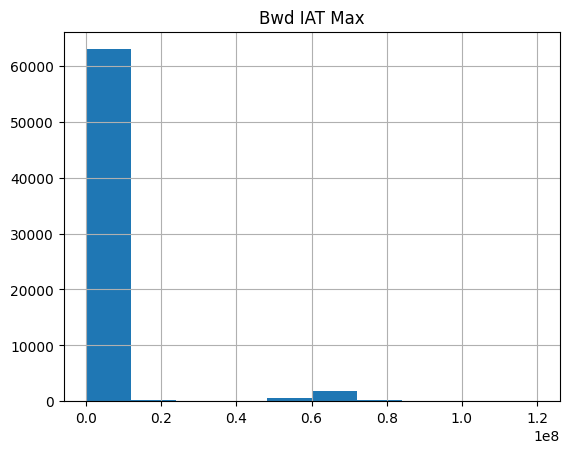

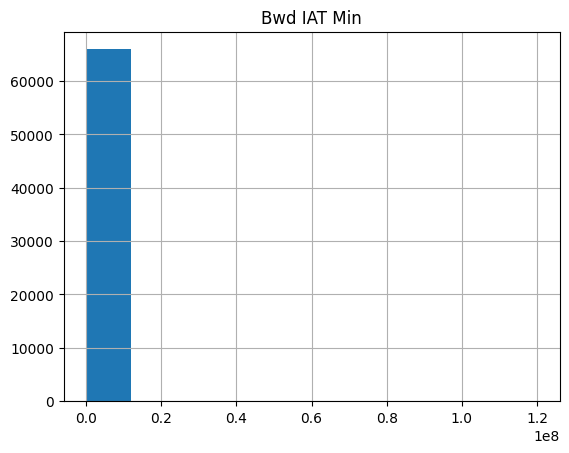

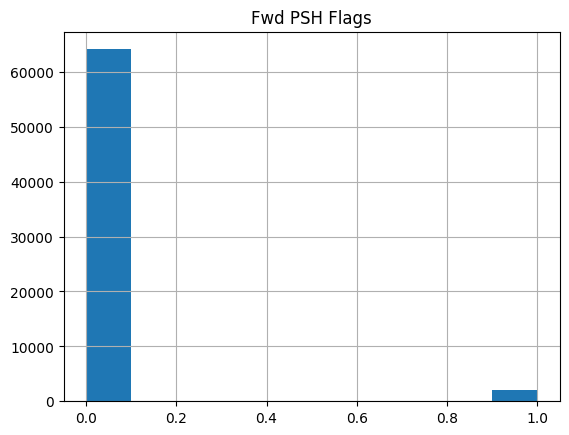

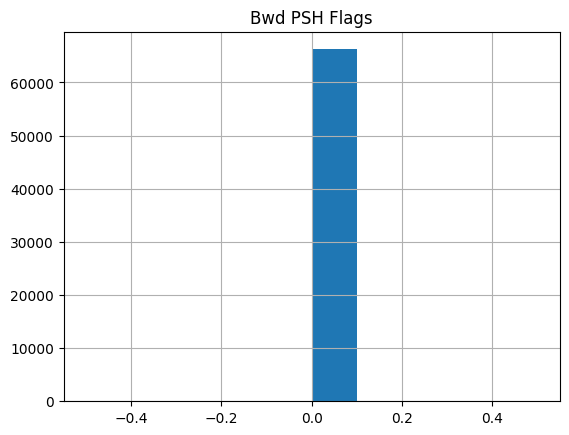

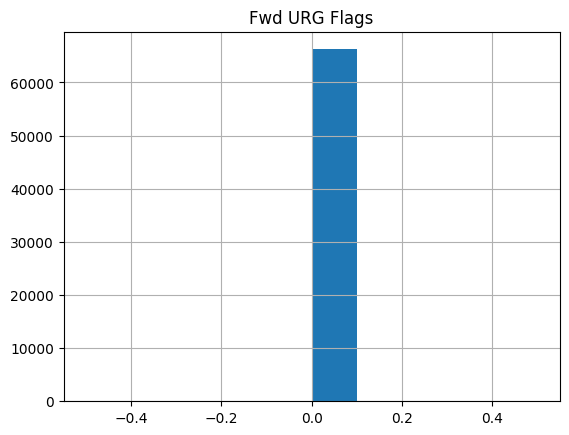

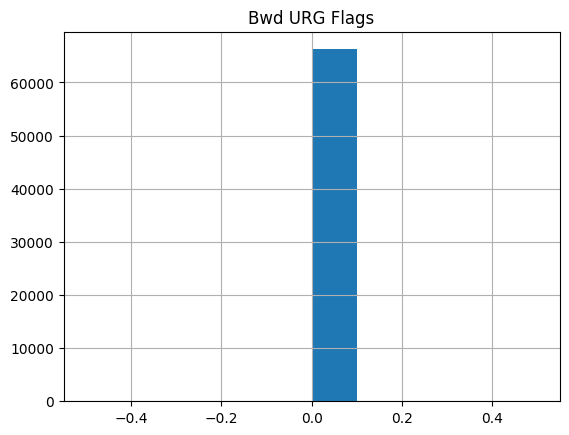

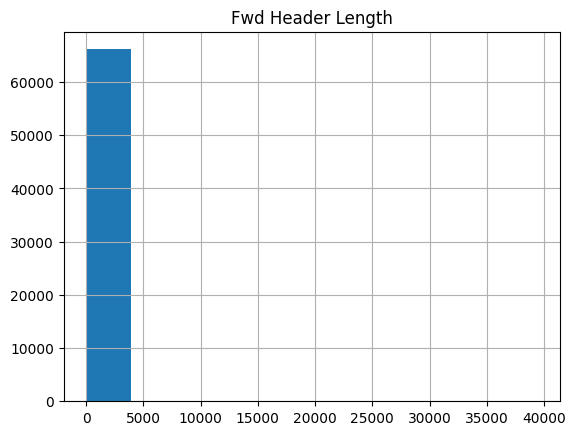

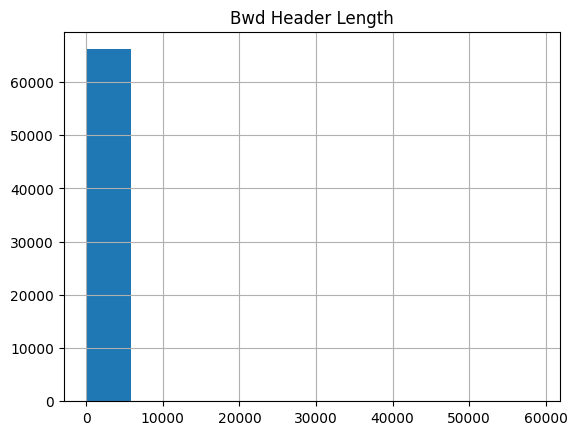

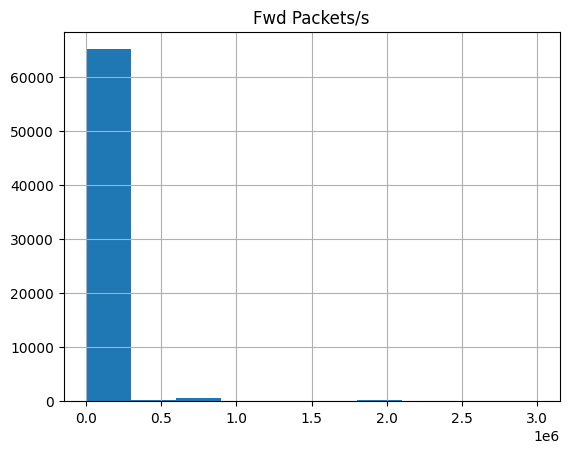

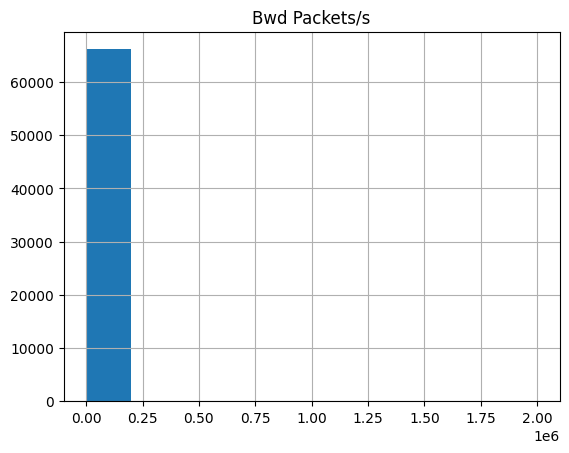

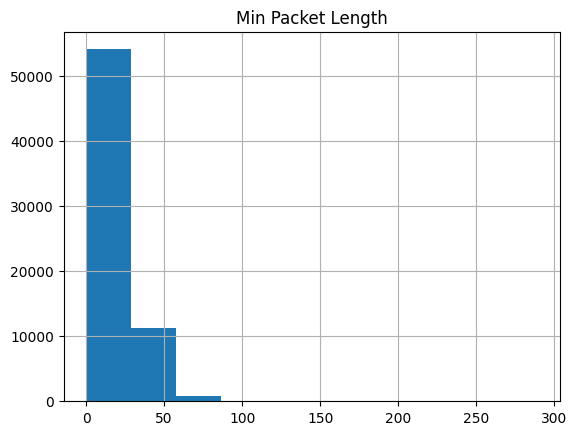

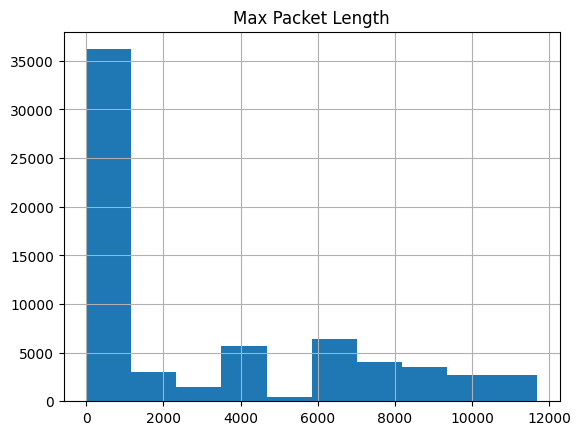

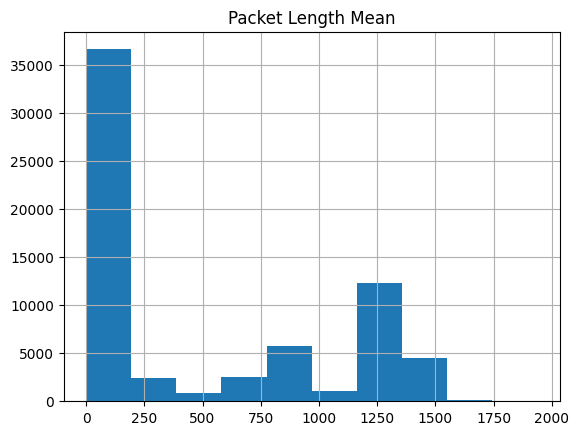

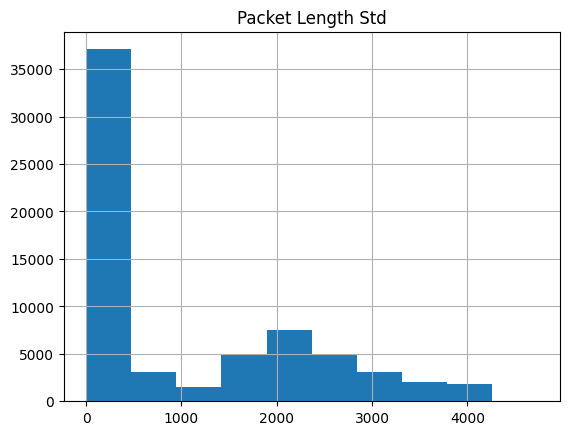

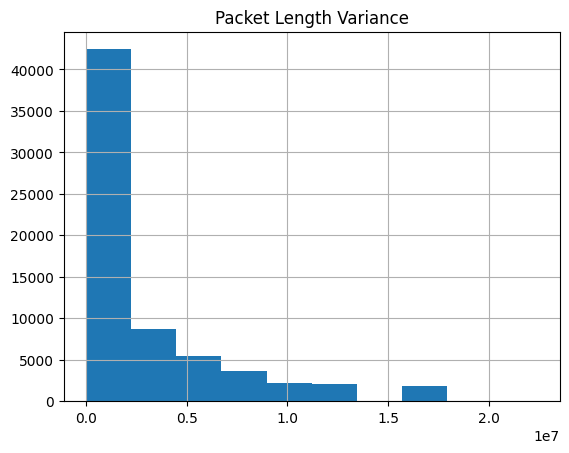

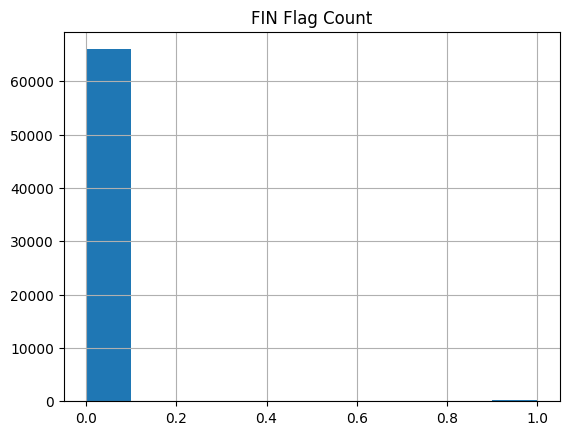

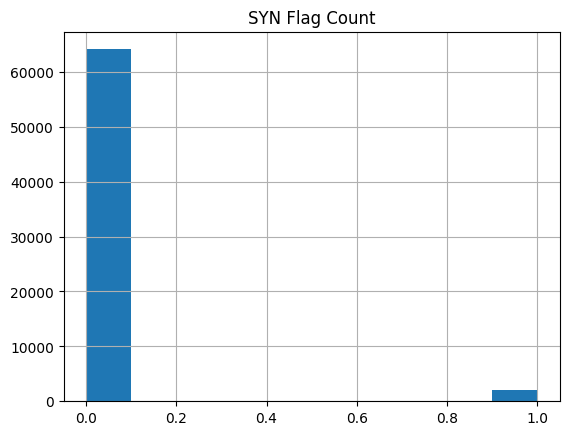

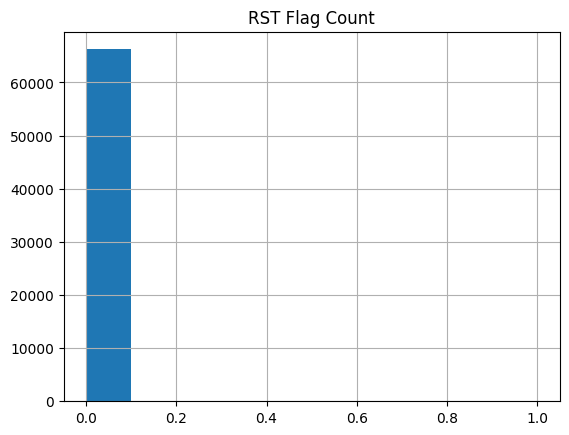

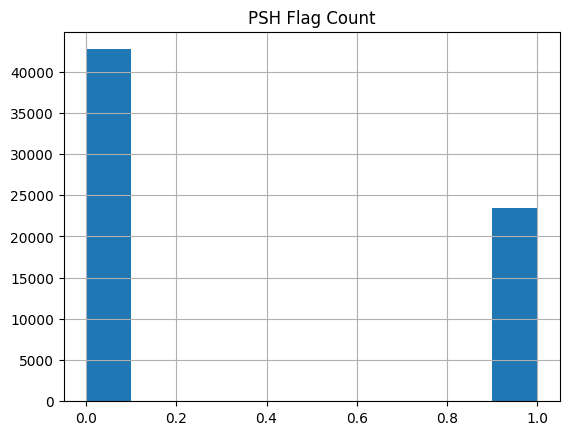

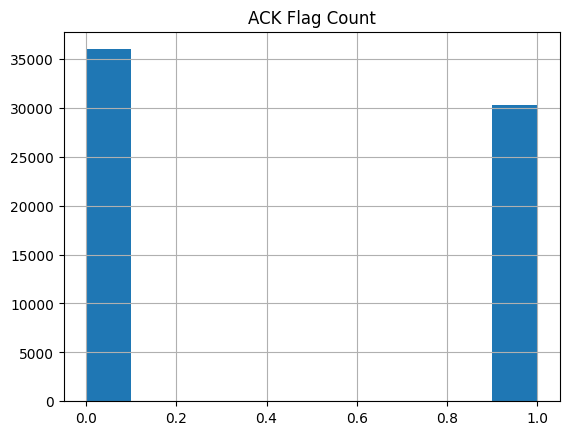

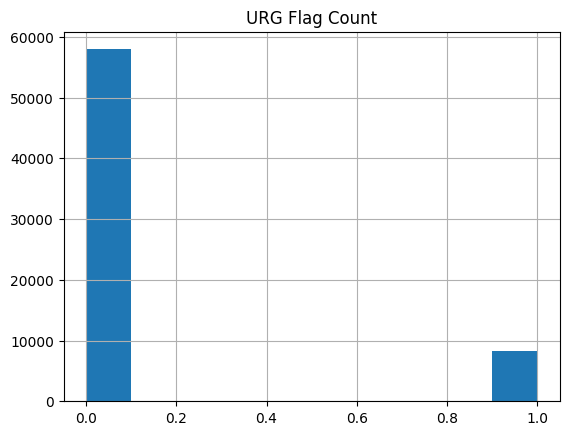

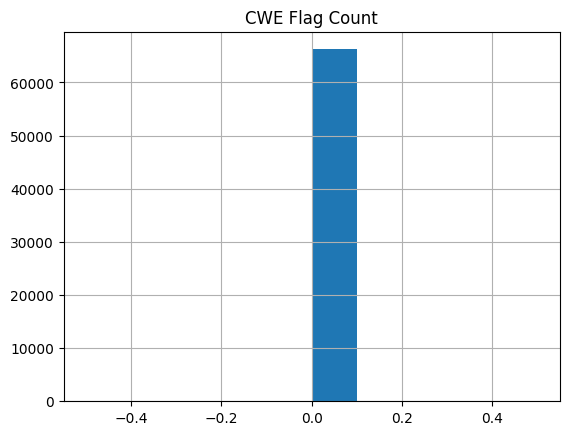

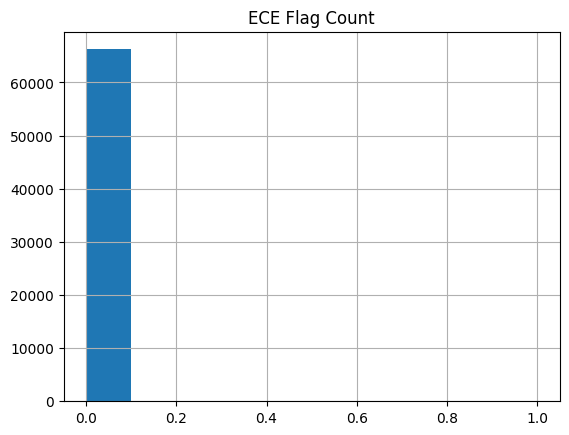

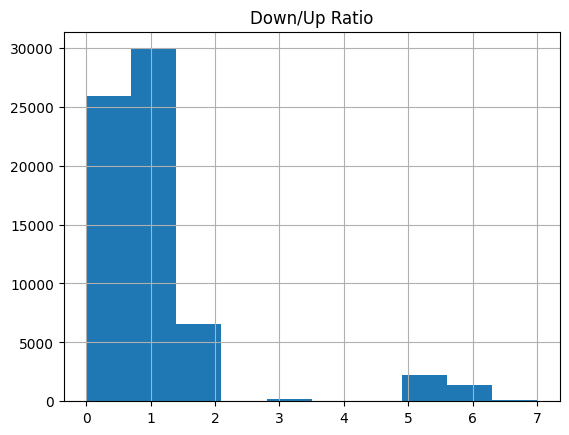

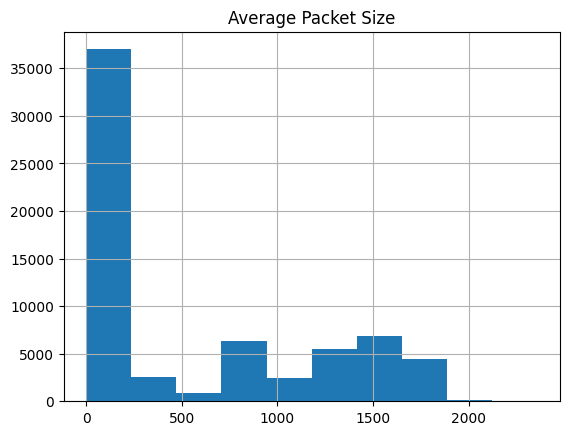

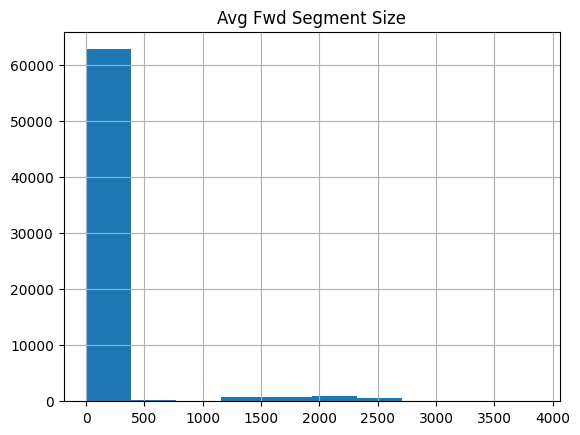

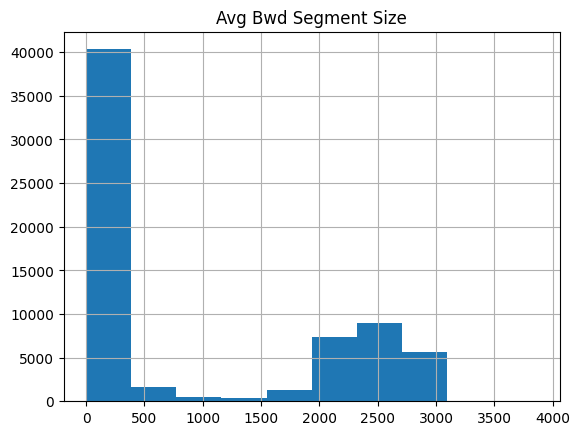

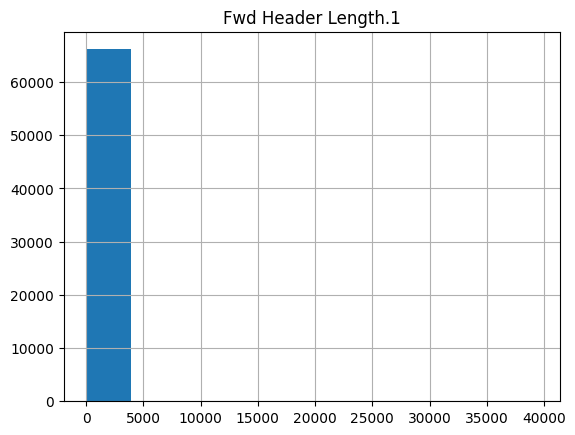

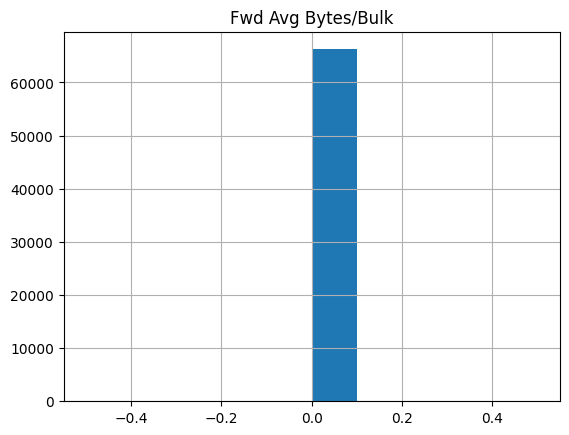

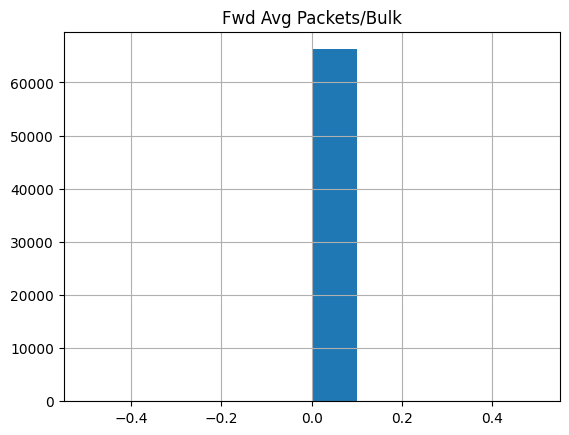

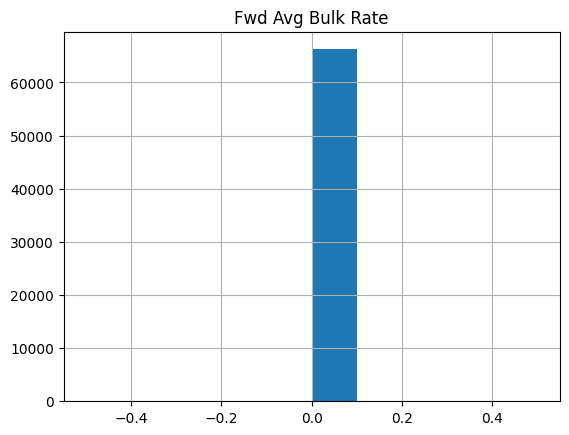

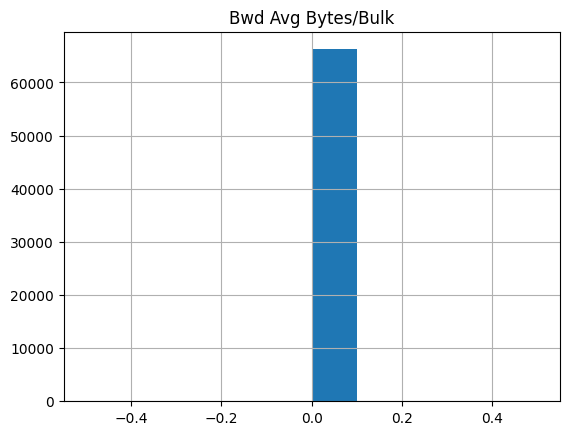

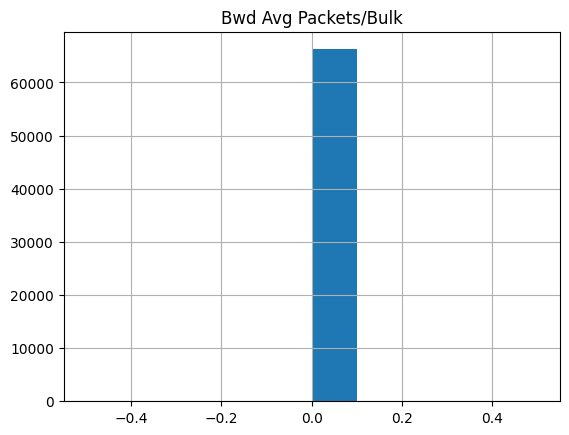

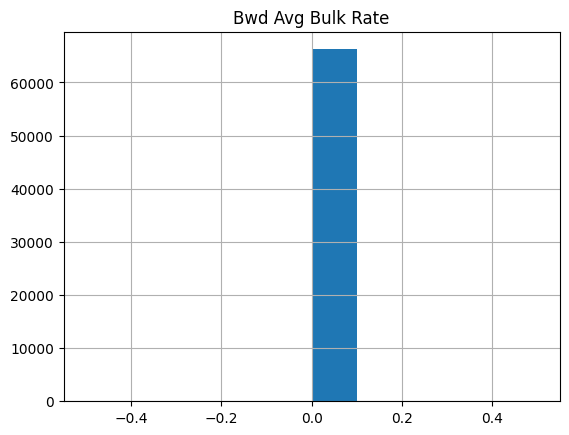

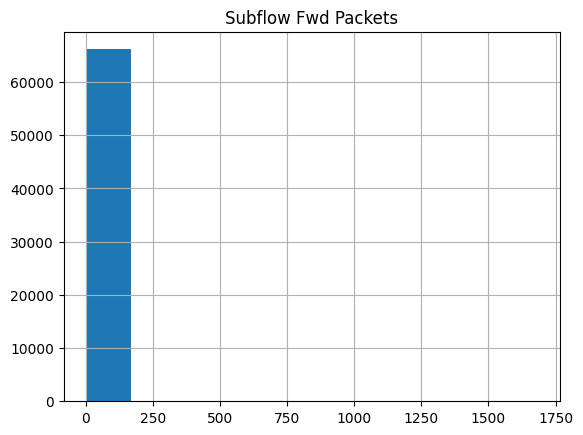

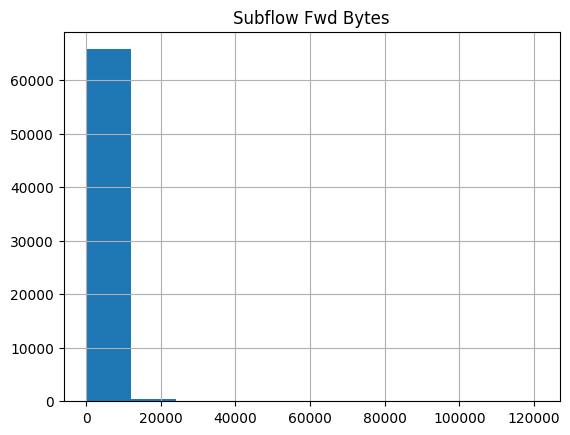

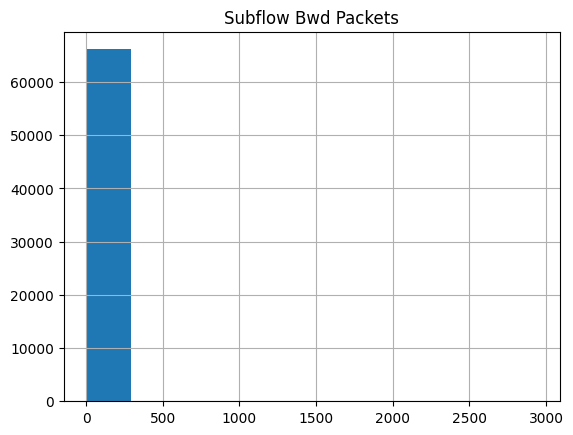

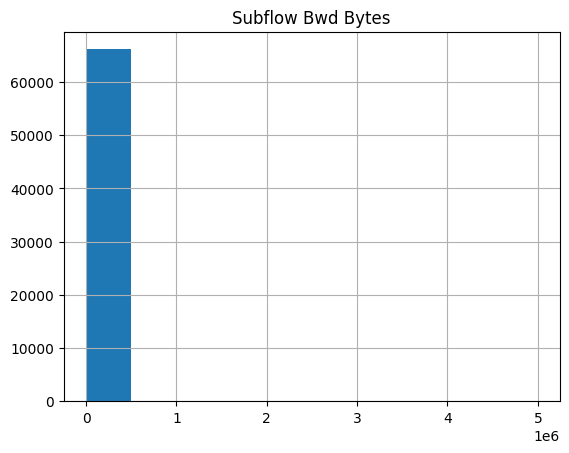

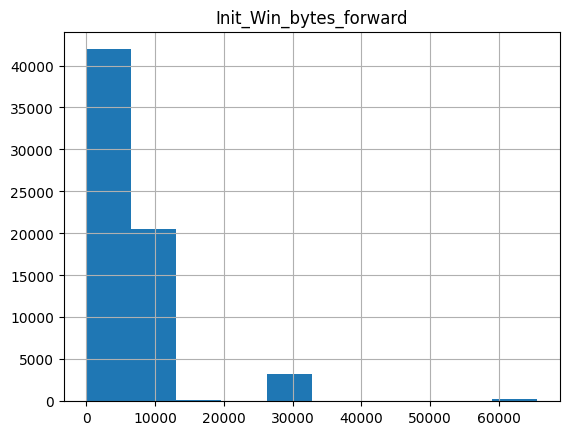

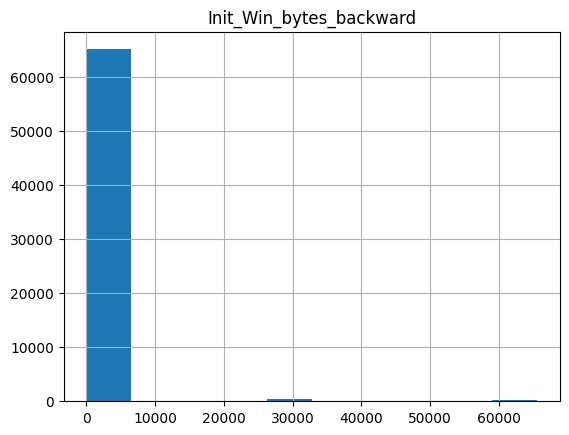

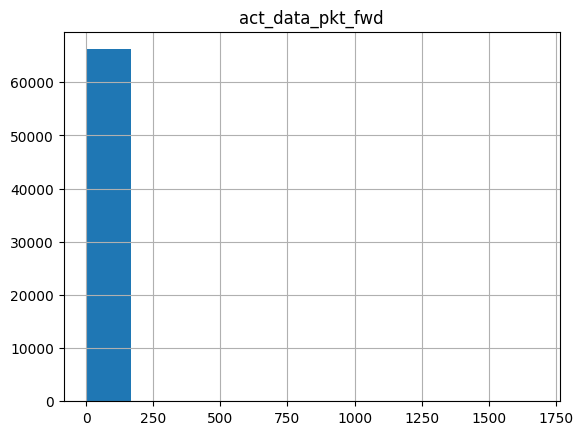

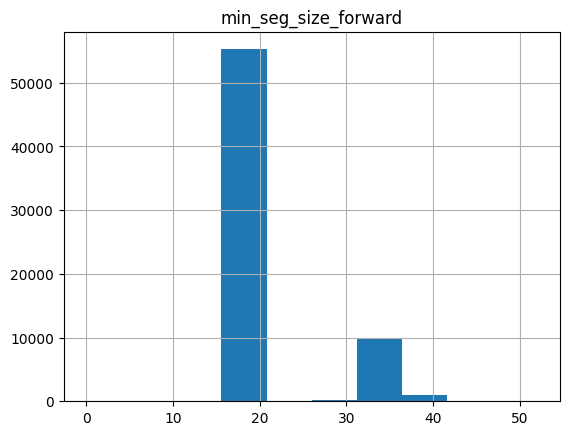

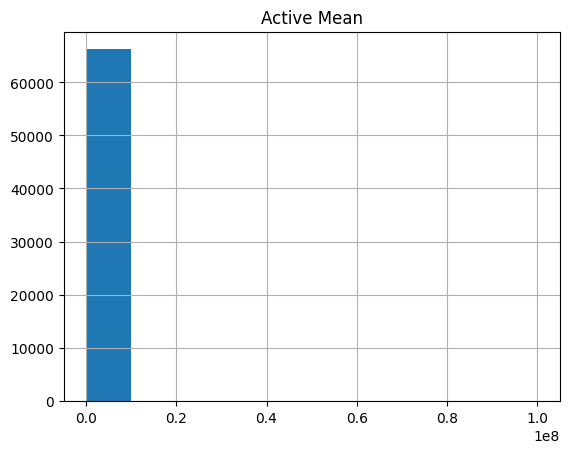

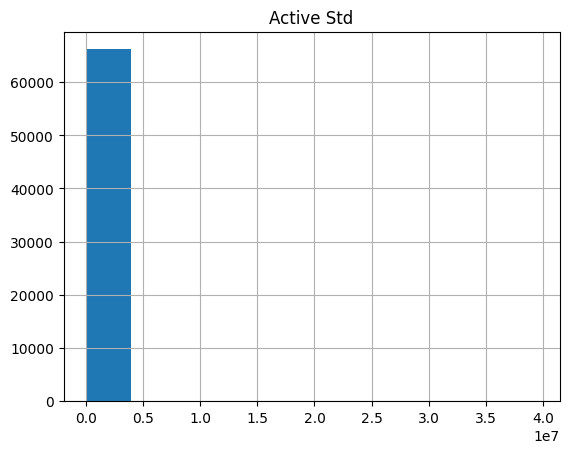

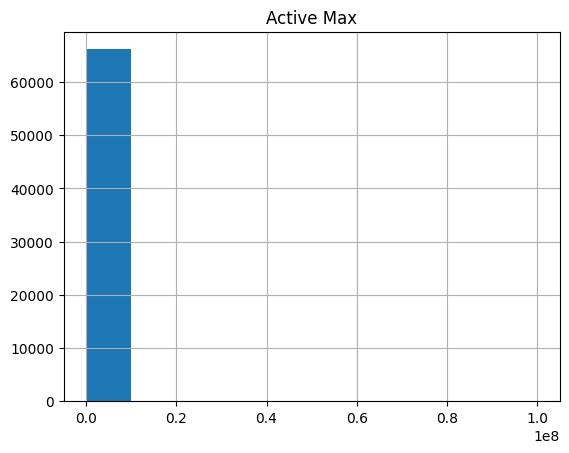

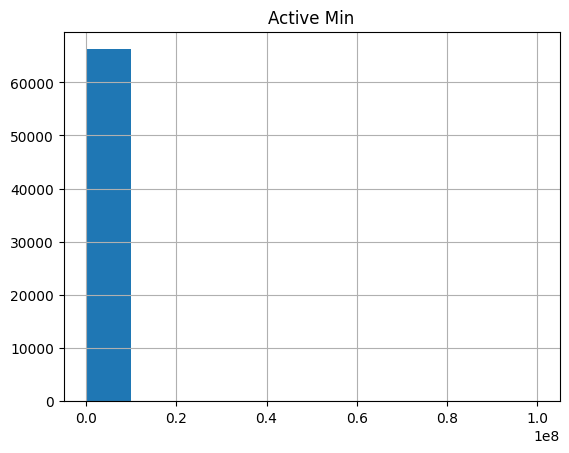

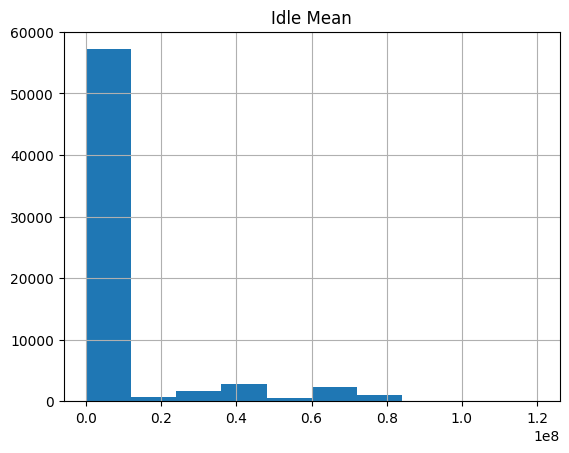

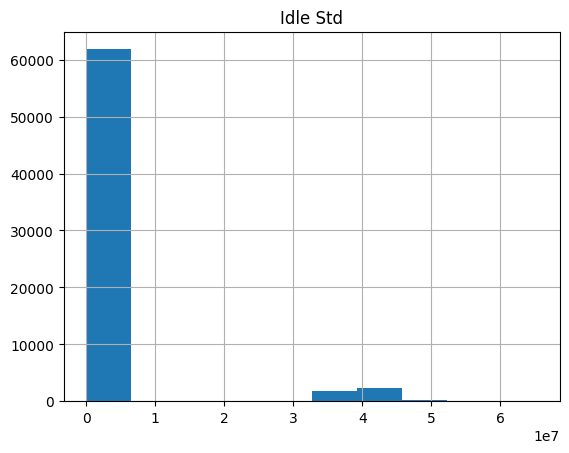

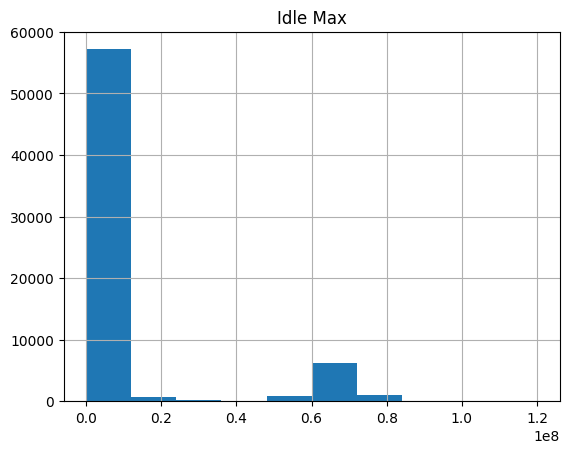

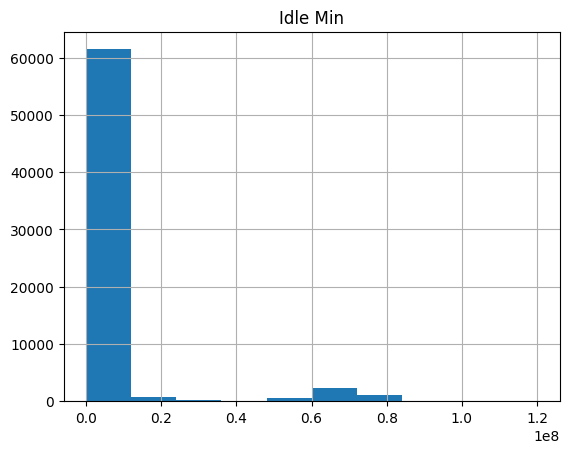

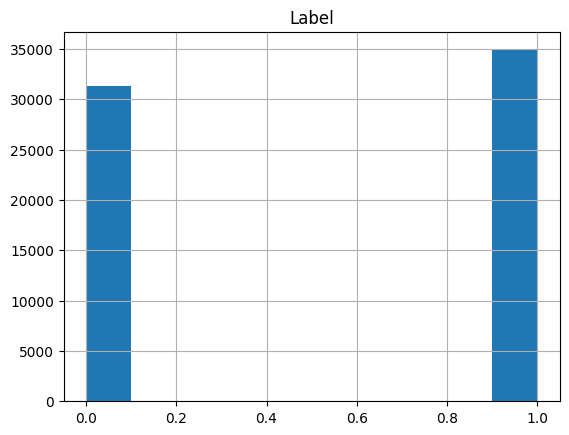

In [ ]:
#For individual plots
plt.figure()
for col in df.columns:
  df[col].hist()
  plt.title(col)
  plt.show()

Train and test split

In [ ]:
#Split data into features and target variables
X = df.drop(['Label'], axis=1) # axis=1 to drop column
Y = df['Label']

In [ ]:
#Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape


(49677, 78)

In [ ]:
X_test.shape

(16559, 78)

Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model = RandomForestClassifier(random_state=42) # Initiate
rf_model.fit(X_train, Y_train) # Training the model
rf_model.score(X_train, Y_train) # Score

1.0

In [ ]:
rf_pred = rf_model.predict(X_test) #Predict output for X_test
#rf_pred is an array of predicted values
#rf_model is a trained model

In [ ]:
rf_pred = rf_pred.astype(int)
print("Y_test dtype:", Y_test.dtype)
print("rf_pred dtype:", rf_pred.dtype)


Y_test dtype: int8
rf_pred dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, rf_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_pred))
print("\nClassification Report:\n", classification_report(Y_test, rf_pred))


Accuracy: 0.999456488918413
Confusion Matrix:
 [[7841    0]
 [   9 8709]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7841
           1       1.00      1.00      1.00      8718

    accuracy                           1.00     16559
   macro avg       1.00      1.00      1.00     16559
weighted avg       1.00      1.00      1.00     16559



In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


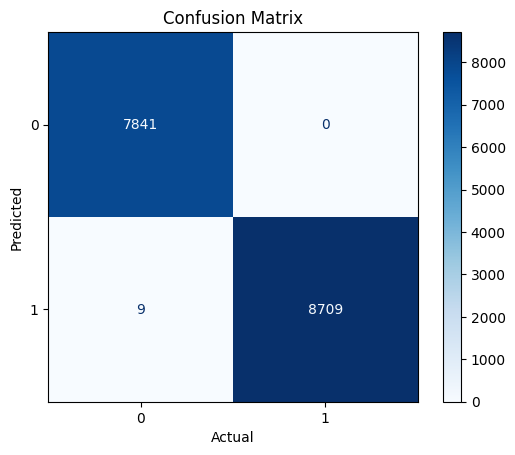

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, Y_test,
                                            cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_model.score(X_train, Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9515469935785172

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
lr_pred.dtype

dtype('int8')

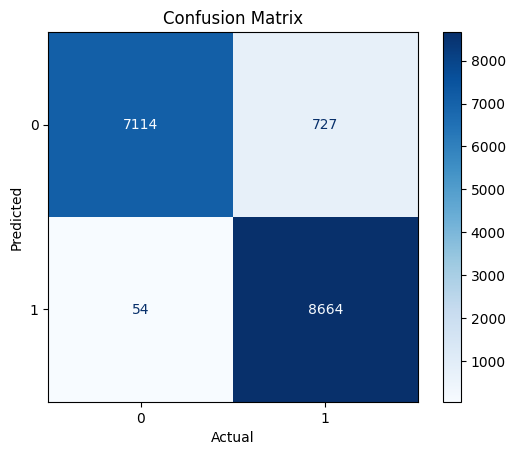

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(lr_model, X_test, Y_test,
                                            cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      7841
           1       0.92      0.99      0.96      8718

    accuracy                           0.95     16559
   macro avg       0.96      0.95      0.95     16559
weighted avg       0.96      0.95      0.95     16559



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)

In [ ]:
knn_pred.dtype

dtype('int8')

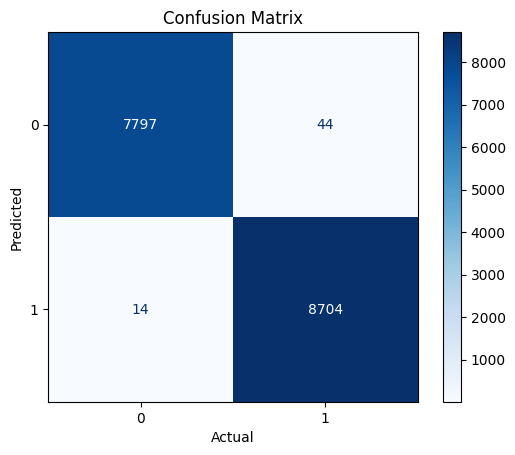

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(knn_model, X_test, Y_test,
                                            cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
dt_model.score(X_train, Y_train)

1.0

In [ ]:
print(classification_report(Y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7841
           1       1.00      1.00      1.00      8718

    accuracy                           1.00     16559
   macro avg       1.00      1.00      1.00     16559
weighted avg       1.00      1.00      1.00     16559



Text(0, 0.5, 'Predicted')

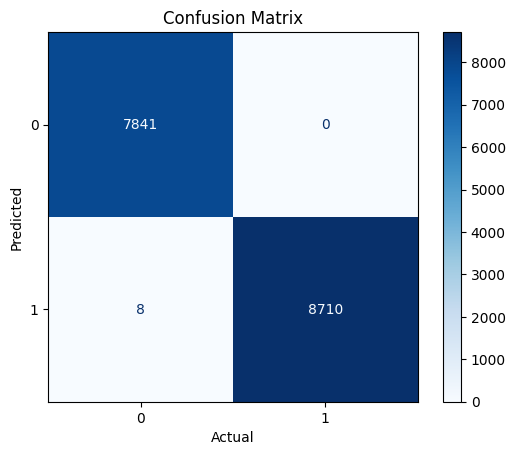

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(dt_model, X_test, Y_test, cmap= plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
mp_model = MLPClassifier()
mp_model = mp_model.fit(X_train, Y_train)
mp_pred = mp_model.predict(X_test)

In [ ]:
mp_model.score(X_train, Y_train)

0.9918473337761942

In [ ]:
mp_pred.dtype

dtype('int8')

Text(0, 0.5, 'Predicted')

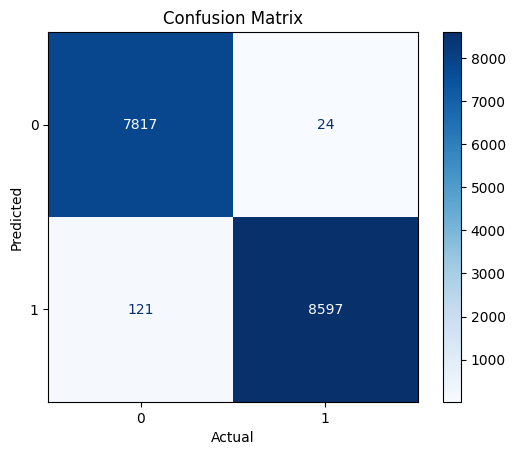

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(mp_model,X_test, Y_test, cmap= plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
if_model = IsolationForest()
if_model = if_model.fit(X_train, Y_train)

In [ ]:
if_pred = if_model.predict(X_test)

In [ ]:
if_pred.dtype

dtype('int64')

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(if_model, X_test, Y_test, cmap= plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

ValueError: ConfusionMatrixDisplay.from_estimator only supports classifiers